In [4]:
from os import makedirs
from os.path import basename, dirname, exists, join, realpath
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import sys

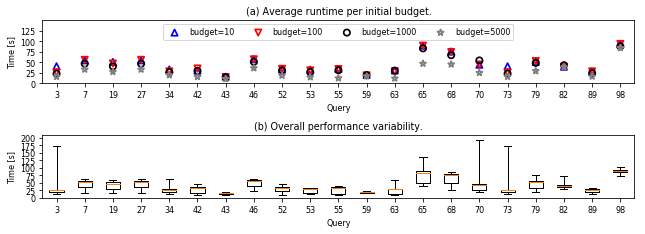

In [5]:

budgets = [10, 100, 1000, 5000]

filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/fig17/'))

def load_data(filename):
	df = pd.read_csv(join(inputdir, filename), sep = ",", names=["budget", "query", "time"])
	return df
	
def get_avg_per_budget(app_df):
	result = []
	for budget in budgets:
		runtimes = app_df.loc[app_df["budget"] == budget]
		result.append(np.mean(runtimes["time"]))
	return result
		
def get_avg_per_app(df, app):
	app_df = df.loc[df["query"] == app]
	result = np.mean(app_df["time"])
	return result
	
def get_apps(df, apps):
	result = dict()
	result2 = []
	for app in apps:
		app_df = df.loc[df["query"] == app]
		app_res = list(app_df["time"])
		app_budget = get_avg_per_budget(app_df)
		result2.append(app_res)
	
	for budget in budgets:
		budget_df = df.loc[df["budget"] == budget]
		interm_res = []
		for app in apps:
			res = get_avg_per_app(budget_df, app)
			interm_res.append(res)
		result[budget] = interm_res
		
	return result, result2
	
font = {'size': 8}
matplotlib.rc('font', **font)
	
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (9, 3.3))
data = load_data("tpcds_budget_results.csv")
queries = [3,7,19,27,34,42,43,46,52,53,55,59,63,65,68,70,73,79,82,89,98]#data["query"].unique()
app_runtime, app_runtime2 = get_apps(data, queries)

#print(app_runtime[10])

ax[0].scatter(np.arange(1, len(app_runtime[10]) + 1), app_runtime[10], label="budget=10", marker="^", lw=1.7, facecolor="none", edgecolor="blue", s=40)
ax[0].scatter(np.arange(1, len(app_runtime[100]) + 1), app_runtime[100], label="budget=100", marker="v", lw=1.7, facecolor="none", edgecolor="red", s=40)
ax[0].scatter(np.arange(1, len(app_runtime[1000]) + 1), app_runtime[1000], label="budget=1000", marker="o", lw=1.7, facecolor="none", edgecolor="black", s=40)
ax[0].scatter(np.arange(1, len(app_runtime[5000]) + 1), app_runtime[5000], label="budget=5000", marker="*", lw=1.7, facecolor="none", edgecolor="grey", s=40)
ax[0].set_xlabel("Query")
ax[0].set_ylabel("Time [s]")
ax[0].set_xlim(0.5, len(queries) + 0.5)
ax[0].set_xticks(np.arange(1, len(queries) + 1))
ax[0].set_xticklabels(queries)
ax[0].set_ylim(0, 150)
ax[0].set_yticks(np.arange(0, 150, 25))
ax[0].legend(ncol=4,loc="upper center")

#print(app_runtime2)

ax[1].boxplot(app_runtime2, whis=[0,100])
ax[1].set_ylim(0, 210)
ax[1].set_yticks(np.arange(0, 210, 25))
ax[1].set_xlim(0.5, len(queries) + 0.5)
ax[1].set_xticks(np.arange(1, len(queries) + 1))
ax[1].set_xticklabels(queries)
ax[1].set_xlabel("Query")
ax[1].set_ylabel("Time [s]")
ax[0].set_title("(a) Average runtime per initial budget.")
ax[1].set_title("(b) Overall performance variability.")
plt.tight_layout()

plt.show()